In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = 100 # number of point per class
d0 = 2 # dimension
C = 3 # number of classes
X = np.zeros((d0, N*C))
y = np.zeros(N*C, dtype='uint8')

for j in range(C):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N) * 0.2
    X[:, ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j

In [4]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis=0, keepdims=True))
    Z = e_V / e_V.sum(axis=0)
    return Z

# One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
    return Y
# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat)) / Y.shape[1]

In [47]:
d0 = 2
d1 = h = 150 # size of hidden layer
d2 = C = 3
# initialize parameters randonly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate
for i in range(10000):
    # Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i%1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y)/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis=1, keepdims=True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis=1, keepdims=True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 1.098756
iter 1000, loss: 0.140256
iter 2000, loss: 0.047288
iter 3000, loss: 0.033319
iter 4000, loss: 0.027863
iter 5000, loss: 0.024720
iter 6000, loss: 0.022668
iter 7000, loss: 0.021190
iter 8000, loss: 0.020080
iter 9000, loss: 0.019208


In [48]:
Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)

print('Training accuracy: %.2f %%' %(100*np.mean(predicted_class)))

Training accuracy: 91.43 %


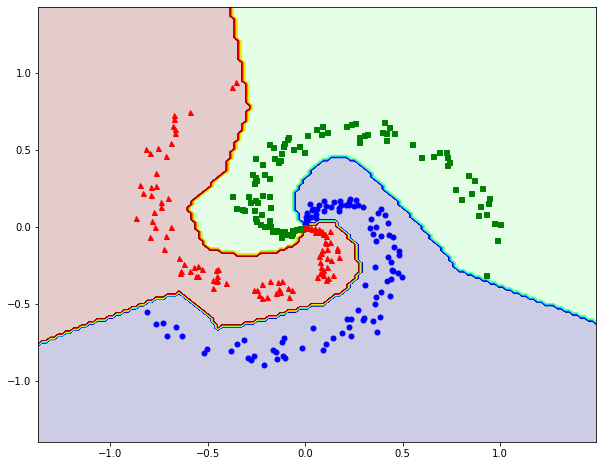

In [49]:
N = 100
xm = np.arange(X[0, :].min() - .5, X[0, :].max() + .5, .02)
ym = np.arange(X[1, :].min() - .5, X[1, :].max() + .5, .02)
xx, yy = np.meshgrid(xm, ym)

xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
X0 = np.vstack((xx1, yy1))

Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2

Z = np.argmax(Z2, axis=0).reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .2)
plt.plot(X[0, :N], X[1, :N], 'bo', markersize=5)
plt.plot(X[0, N:2*N], X[1, N:2*N], 'gs', markersize=5)
plt.plot(X[0, 2*N:], X[1, 2*N:], 'r^', markersize=5)
plt.show()